In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [6]:
data1=pd.read_csv("NewspaperData.csv")
data1.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [10]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


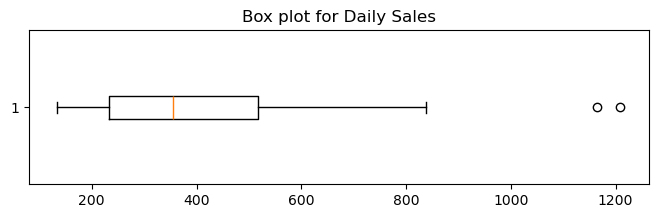

In [20]:
plt.figure(figsize=(8,2))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1['daily'],vert=False)
plt.show()

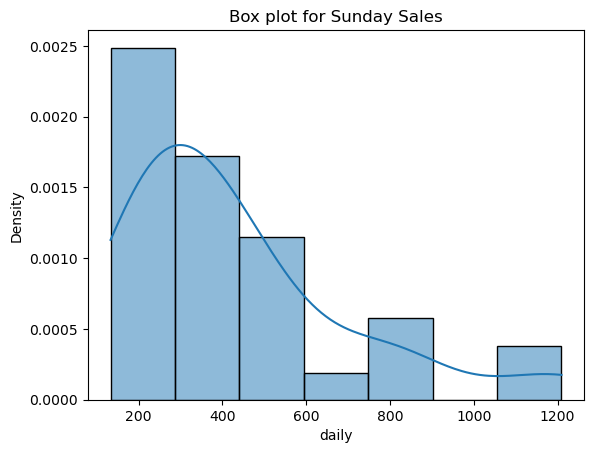

In [24]:
sns.histplot(data1['daily'],kde=True,stat='density')
plt.title("Box plot for Sunday Sales")
plt.show()
        

# Observations 
* There are no missing values
* The daily column values appears to be right-skewed
* The sunday column values also appear to be right-skewed
* There are two outliers in both daily column and also in sunday column as observed from the above table

##### Scatter plot and Correlation Strength

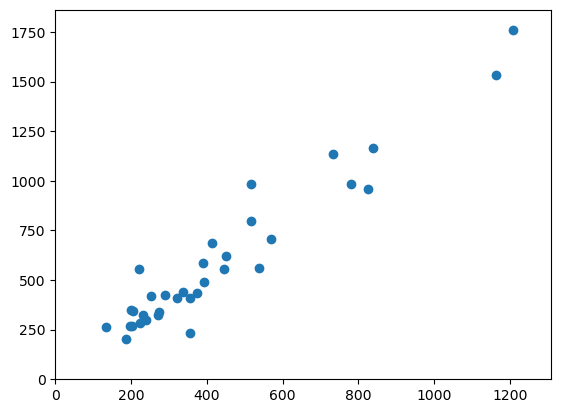

In [34]:
x=data1['daily']
y=data1['sunday']
plt.scatter(data1['daily'],data1['sunday'])
plt.xlim(0,max(x)+100)
plt.ylim(0,max(y)+100)
plt.show()

In [36]:
data1['daily'].corr(data1['sunday'])

0.9581543140785465

In [38]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [40]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [42]:
# Build regression model
import statsmodels.formula.api as smf
model1=smf.ols("sunday~daily",data=data1).fit()

In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        12:39:16   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""